# Code to compare two tickers

In [28]:
tickers = 'ZSP-U.TO','^SPX' # comme le S&P500 mais avec +3%

tickers = 'ZQQ.TO','ZNQ.TO' # 
tickers = 'ZPAY.TO','^SPX' # dispersion très basse, principalement des dividendes

tickers = 'AMSF','^SPX' # dispersion très basse, principalement des dividendes

#tickers = 'ZWG.TO','^SPX' # 


#tickers = 'ZLU.TO','ZCN.TO'
#tickers = 'ZGLD.TO','XGD.TO'
#tickers = '^SPX','XGD.TO'
#tickers = 'DRFC.TO','^SPX'
#tickers = 'GEV.TO','ZLU.TO'
#tickers = 'BKCL.TO','EBNK.TO'
#tickers = 'ZEA.TO','^SPX'
#tickers = 'ZLU.TO','VE.TO'

#tickers = 'ZLU.TO','^SPX'
#tickers = 'ZLU.TO','ZGLD.TO'
#tickers = 'HURA.TO','DRFC.TO'
#tickers = 'EBNK.TO','^SPX'
#tickers = 'BKCL.TO','^SPX'
#tickers = 'ZLB.TO','ZWP.TO'
#tickers = 'ZPAY.TO','ZWG.TO'
#tickers = 'ZCN.TO','ZSP.TO'


#tickers = 'ZEA.TO','ZDH.TO'


In [29]:
import bydoux_tools as bt
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Read the historical quotes for both tickers using the custom bydoux_tools function.
tbl1 = bt.read_quotes(tickers[0])
tbl2 = bt.read_quotes(tickers[1])

# Find the maximum of the first available dates (start of overlapping period)
mini = np.max([tbl1['mjd'][0], tbl2['mjd'][0]])
# Find the minimum of the last available dates (end of overlapping period)
maxi = np.min([tbl1['mjd'][-1], tbl2['mjd'][-1]])

# Create boolean masks for each table, keeping only rows within the overlapping date range
keep1 = (tbl1['mjd'] >= mini) & (tbl1['mjd'] <= maxi)
keep2 = (tbl2['mjd'] >= mini) & (tbl2['mjd'] <= maxi)

# Center the log_close values for each ticker by subtracting their mean
# This allows for easier visual comparison of trends
tbl1['log_close'] -= np.mean(tbl1['log_close'])
tbl2['log_close'] -= np.mean(tbl2['log_close'])

# Fit a linear trend (slope) to the log_close values over time (in years) for each ticker
# This gives the average annualized log-return trend for each asset
fit = np.polyfit(tbl1['mjd'] / 365.24, tbl1['log_close'], 1)
print(tickers[0], fit[0])  # Print the slope for ticker 1
fit = np.polyfit(tbl2['mjd'] / 365.24, tbl2['log_close'], 1)
print(tickers[1], fit[0])  # Print the slope for ticker 2

# Now, create boolean arrays to mark only the dates that are present in both tables (intersection)
keep1 = np.zeros_like(tbl1['mjd'], dtype=bool)
keep2 = np.zeros_like(tbl2['mjd'], dtype=bool)

# For each date in tbl1, if it exists in tbl2, mark as True in both masks
for i in range(len(tbl1)):
    if tbl1['mjd'][i] in tbl2['mjd']:
        keep1[i] = True  # Mark this date as present in both for tbl1
        # Find the index in tbl2 where the date matches and mark as True
        keep2[np.where(tbl2['mjd'] == tbl1['mjd'][i])[0][0]] = True

We do not have the file /Users/eartigau/bydoux_data/quotes/AMSF.fits, downloading it from Yahoo
0.0
Writing /Users/eartigau/bydoux_data/quotes/AMSF.fits
We have the file /Users/eartigau/bydoux_data/quotes/^SPX.fits
-1.9871183136492618
AMSF 0.18320167595108391
^SPX 0.06658846127234645


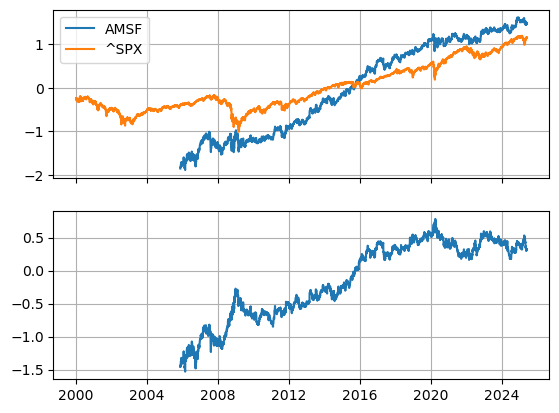

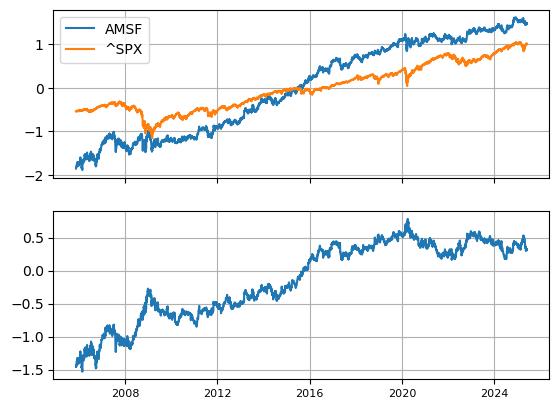

Evolution sur l'intervale commun
AMSF 0.18320167595108391
^SPX 0.08866223126792386


In [31]:
# Plot 1: Show both tickers' log_close values over time (full available range)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)  # Create a figure with 2 subplots sharing the x-axis
# Plot the first ticker's log_close values (all dates)
ax[0].plot(tbl1['plot_date'], tbl1['log_close'], label=tickers[0])
# Plot the second ticker's log_close values (all dates)
ax[0].plot(tbl2['plot_date'], tbl2['log_close'], label=tickers[1])
# Plot the difference between the two tickers' log_close values (only on common dates)
ax[1].plot(tbl1['plot_date'][keep1], tbl1['log_close'][keep1] - tbl2['log_close'][keep2])
# Add a legend to the first subplot
ax[0].legend()
ax[0].grid()
ax[1].grid()
# Display the plot
plt.show()

# Plot 2: Show both tickers' centered log_close values and their difference (only on common dates)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)  # Create a new figure with 2 subplots
# Plot the first ticker's centered log_close values (mean subtracted, only common dates)
ax[0].plot(
    tbl1['plot_date'][keep1],
    tbl1['log_close'][keep1] - np.mean(tbl1['log_close'][keep1]),
    label=tickers[0]
)
# Plot the second ticker's centered log_close values (mean subtracted, only common dates)
ax[0].plot(
    tbl2['plot_date'][keep2],
    tbl2['log_close'][keep2] - np.mean(tbl2['log_close'][keep2]),
    label=tickers[1]
)
# Plot the difference between the two tickers (only on common dates)
ax[1].plot(
    tbl1['plot_date'][keep1],
    tbl1['log_close'][keep1] - tbl2['log_close'][keep2]
)
# Add a legend to the first subplot
ax[0].legend()
# Change the font size of the x-axis tick labels for both subplots for better readability
for tick in ax[0].get_xticklabels():
    tick.set_fontsize(8)
for tick in ax[1].get_xticklabels():
    tick.set_fontsize(8)
# Display the plot

ax[0].grid()
ax[1].grid()
plt.show()

# Print the evolution (trend) of each ticker on the common interval
print("Evolution sur l'intervale commun")
# Fit a linear trend (slope) to the first ticker's log_close values over time (common dates, time in years)
fit = np.polyfit(tbl1['mjd'][keep1] / 365.24, tbl1['log_close'][keep1], 1)
print(tickers[0], fit[0])  # Print the slope for the first ticker
# Fit a linear trend (slope) to the second ticker's log_close values over time (common dates, time in years)
fit = np.polyfit(tbl2['mjd'][keep2] / 365.24, tbl2['log_close'][keep2], 1)
print(tickers[1], fit[0])  # Print the slope for the second ticker

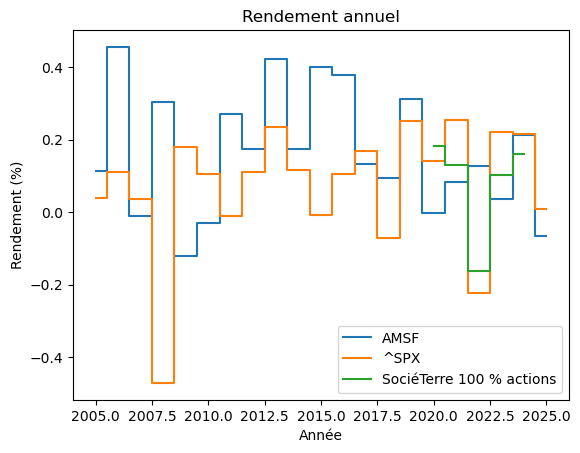

Moyenne et écart type
moyenne AMSF, mu 16.48%, sigma 16.51%
moyenne ^SPX, mu 7.20%, sigma 16.77%
Valeurs pour la période 2019-2025
moyenne AMSF, mu 10.06%, sigma 11.99%
moyenne ^SPX, mu 12.41%, sigma 16.25%
moyenne SociéTerre, mu 8.24%, sigma 12.48%


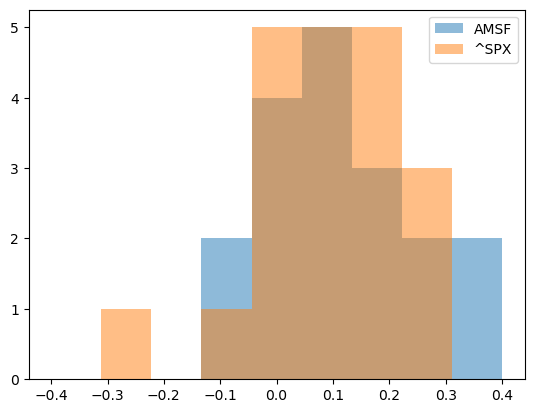

In [32]:
# Compute unique years present in tbl1 for the dates where keep1 is True (i.e., common dates)
uyrs1 = np.unique(tbl1['year'][keep1])
# Initialize an array to store annual log returns for ticker 1
avg1 = np.zeros_like(uyrs1, dtype=float)
# Loop over each unique year for ticker 1
for i, uyr in enumerate(uyrs1):
    # For the current year, extract the first and last log_close value
    v1, v2 = tbl1[tbl1['year'] == uyr]['log_close'][[0, -1]]
    # Compute the log return for the year and store it
    avg1[i] = v2 - v1

# Repeat the same process for ticker 2
uyrs2 = np.unique(tbl2['year'][keep2])  # Unique years for ticker 2 (on common dates)
avg2 = np.zeros_like(uyrs2, dtype=float)  # Array for annual log returns
for i, uyr in enumerate(uyrs2):
    v1, v2 = tbl2[tbl2['year'] == uyr]['log_close'][[0, -1]]
    avg2[i] = v2 - v1

# --- PLOTTING ANNUAL RETURNS AS STEP PLOTS ---
# Plot annual log returns for ticker 1 as a step plot
plt.step(uyrs1, avg1, where='mid', label=tickers[0])
# Plot annual log returns for ticker 2 as a step plot
plt.step(uyrs2, avg2, where='mid', label=tickers[1])

# Add reference data for SociéTerre 100 % actions (manually entered)
vv = [2024, 2023, 2022, 2021, 2020]  # Years for SociéTerre
rate = [16.09, 10.15, -16.12, 12.94, 18.16]  # Annual returns in percent
rate = np.array(rate) / 100  # Convert percent to fraction for plotting
# Plot SociéTerre returns as a step plot
plt.step(vv, rate, where='mid', label='SociéTerre 100 % actions')
plt.title('Rendement annuel')  # Set plot title
plt.xlabel('Année')            # X-axis label
plt.ylabel('Rendement (%)')    # Y-axis label

plt.legend()                   # Show legend
plt.show()                     # Display the plot

# --- STATISTICS: MEAN AND STANDARD DEVIATION ---
print('Moyenne et écart type')
# Compute mean and std of annual returns for ticker 1 (convert to percent)
mu1 = np.mean(avg1) * 100
sig1 = np.std(avg1) * 100
# Compute mean and std for ticker 2
mu2 = np.mean(avg2) * 100
sig2 = np.std(avg2) * 100
# Print results for both tickers
print(f'moyenne {tickers[0]}, mu {mu1:.2f}%, sigma {sig1:.2f}%')
print(f'moyenne {tickers[1]}, mu {mu2:.2f}%, sigma {sig2:.2f}%')

# --- STATISTICS FOR 2019-2025 PERIOD ONLY ---
print('Valeurs pour la période 2019-2025')
# Create boolean masks for years >= 2019 for both tickers
g1 = uyrs1 >= 2019
g2 = uyrs2 >= 2019

# Compute mean and std for ticker 1, 2019-2025
mu1 = np.mean(avg1[g1]) * 100
sig1 = np.std(avg1[g1]) * 100
# Compute mean and std for ticker 2, 2019-2025
mu2 = np.mean(avg2[g2]) * 100
sig2 = np.std(avg2[g2]) * 100
# Print results for both tickers for this period
print(f'moyenne {tickers[0]}, mu {mu1:.2f}%, sigma {sig1:.2f}%')
print(f'moyenne {tickers[1]}, mu {mu2:.2f}%, sigma {sig2:.2f}%')

# --- STATISTICS FOR SociéTerre REFERENCE ---
# Compute mean and std for SociéTerre reference returns (in percent)
mu = np.mean(rate) * 100
sig = np.std(rate) * 100
print(f'moyenne SociéTerre, mu {mu:.2f}%, sigma {sig:.2f}%')

# --- HISTOGRAMS OF ANNUAL RETURNS ---
# Plot histogram of annual returns for ticker 1
plt.hist(avg1, bins=9, range=[-.4, .4], alpha=0.5, label=tickers[0])
# Plot histogram of annual returns for ticker 2
plt.hist(avg2, bins=9, range=[-.4, .4], alpha=0.5, label=tickers[1])

plt.legend()   # Show legend
plt.show()     # Display the histogram

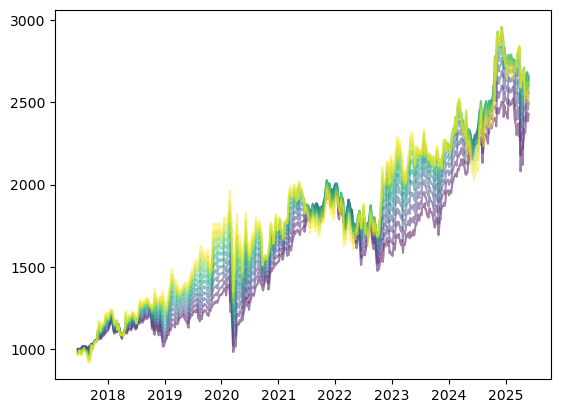

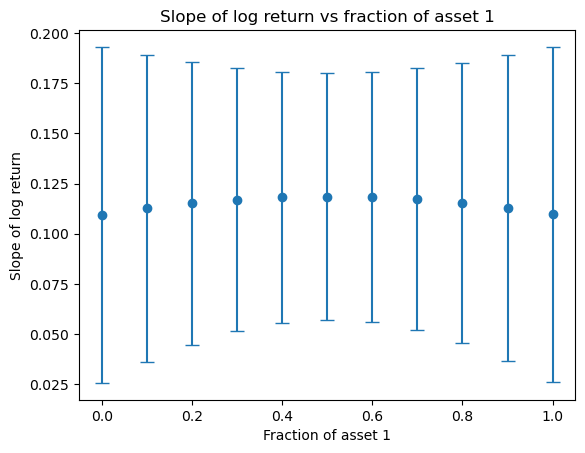

In [33]:
tbl1b = tbl1[keep1]
tbl2b = tbl2[keep2]

tbl1b = tbl1b[-2000:]
tbl2b = tbl2b[-2000:]

f1 = 0.5

#colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']


dt = 3


f1s = np.arange(0.0, 1.1, 0.1)  # Fractional weights for the first asset
slopes = []
volatilities = []

# define colors for the plots with a palette for the number of f1s
colors = plt.cm.viridis(np.linspace(0, 1, len(f1s)))

for ii, f1 in enumerate(f1s):
    full_amounts = []
    dates = []
    mjds = []
    full_amount = 1000

    n1 = full_amount*f1
    n2 = full_amount*(1-f1)
    #print(tbl1b['Close_dividends'][0], tbl2b['Close_dividends'][0])
    #print(tbl1b['Close_dividends'][1], tbl2b['Close_dividends'][1])

    for i in range(dt,len(tbl1b),dt):
        n1= n1 * np.exp(tbl1b['log_close'][i] - tbl1b['log_close'][i-dt])
        n2= n2 * np.exp(tbl2b['log_close'][i] - tbl2b['log_close'][i-dt])

        full_amount = n1 + n2
        n1 = full_amount*f1
        n2 = full_amount*(1-f1)
        #plt.plot(i,full_amount, '.', alpha=0.1)
        dates.append(tbl1b['plot_date'][i])
        mjds.append(tbl1b['mjd'][i])
        full_amounts.append(full_amount)
    plt.plot(dates, full_amounts, label=f'{f1:.1f}', color=colors[ii], alpha=0.5)

    mjds = np.array(mjds)
    full_amounts = np.array(full_amounts)

    fit = np.polyfit(mjds/365.25,np.log(full_amounts),1)
    residual = np.log(full_amounts) - (fit[0]*mjds/365.25 + fit[1])
    rms = np.sqrt(np.mean(residual**2))
    slopes.append(fit[0])
    volatilities.append(np.std(residual))
plt.show()

slopes = np.array(slopes)
volatilities = np.array(volatilities)
f1s = np.array(f1s)

plt.errorbar(f1s, slopes, yerr=volatilities, fmt='o', capsize=5)
plt.xlabel('Fraction of asset 1')
plt.ylabel('Slope of log return')
plt.title('Slope of log return vs fraction of asset 1')
plt.show()# convert dates to mjd


